# Exploratory Data Analysis (EDA) on Titanic Dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore the Data

In [28]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.groupby('pclass')['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

In [33]:
df.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

In [34]:
df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\1252492591.py:1: FutureWarning: The provided callable <function sum at 0x000001AE1A0EAF20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)
C:\Users\akash\AppData\Local\Temp\ipykernel_18640\1252492591.py:1: FutureWarning: The provided callable <function sum at 0x000001AE1A0EAF20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived', 'sex', 'pclass', aggfunc=np.sum, margins=True)
C:\Users\akash\AppData\Local\Temp\ipykernel_18640\1252492591.py:1: FutureWarning: The provided callable <function sum at 0x000001AE1A0EAF20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the pro

pclass,1,2,3,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


### Handle Missing Data

In [35]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
df['age'].median()

np.float64(28.0)

In [37]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [38]:
df['embarked'].fillna(df['embarked'].mode(0),inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\227314888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode(0),inplace=True)


### drop deck column

In [39]:
df.drop(columns=['deck'],inplace=True)

In [40]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

# Removing Duplicates

In [41]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 116


remove duplicates


In [42]:
df.drop_duplicates(inplace=True)
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


 # Handling Outliers

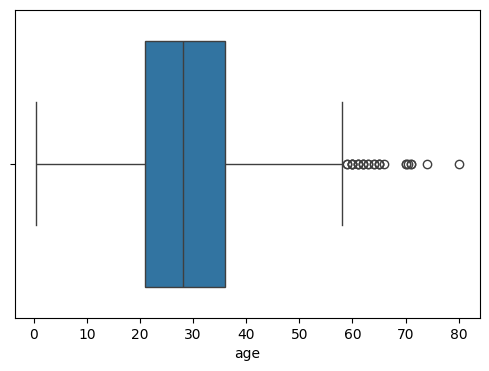

In [57]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

In [58]:
# Remove outliers using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)

# Remove outliers
df = df[(df['age'] >= lower_limit) & (df['age'] < upper_limit)]
df

-1.5 58.5


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


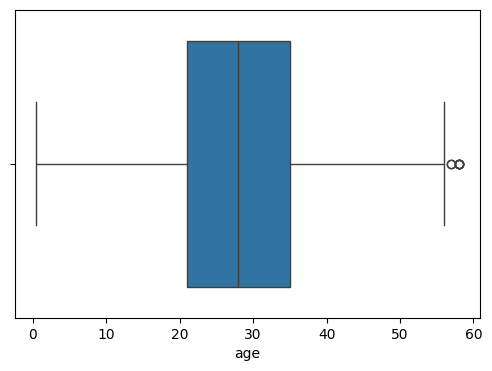

In [59]:
# Boxplot to check outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.show()

# Univariate Analysis

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\1365214666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='coolwarm')


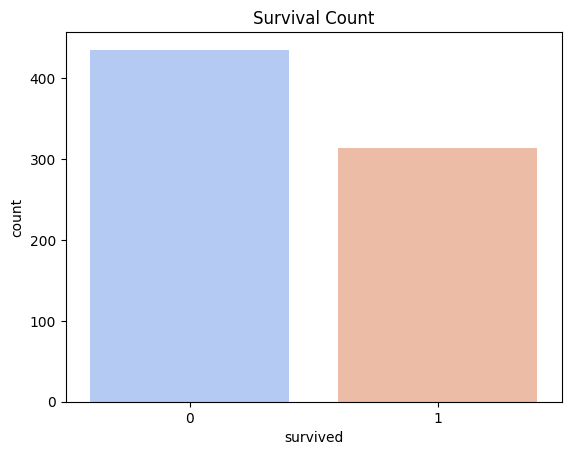

In [60]:
# Countplot for survival
sns.countplot(x='survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.show()

In [61]:
# Survival rate percentage
survival_rate = df['survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")

Survival Rate: 41.84%


C:\Users\akash\AppData\Local\Temp\ipykernel_18640\707820808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='viridis')


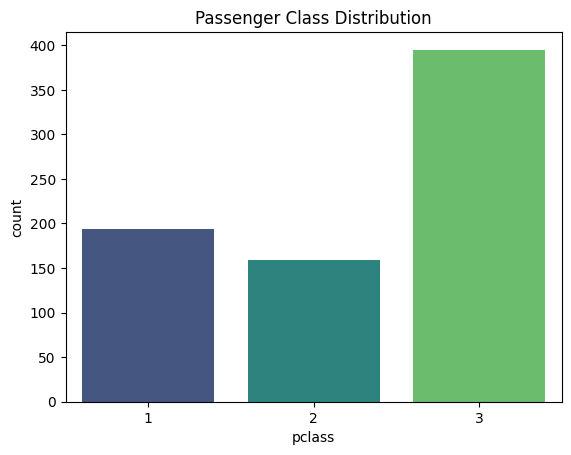

In [62]:
# Passenger Class Distribution
sns.countplot(x='pclass', data=df, palette='viridis')
plt.title("Passenger Class Distribution")
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\1360802791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


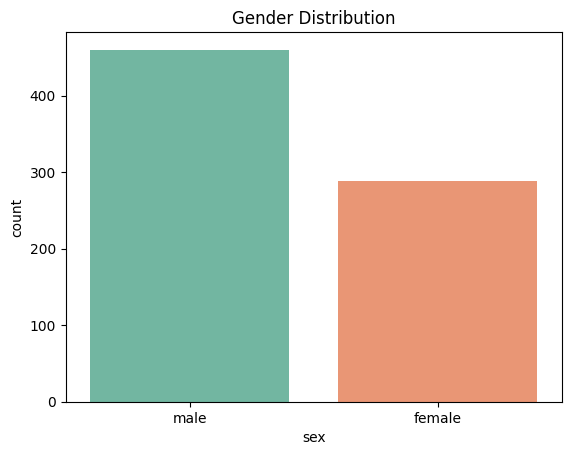

In [63]:
# Gender Distribution
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

 # Bivariate Analysis

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\953443089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='magma')


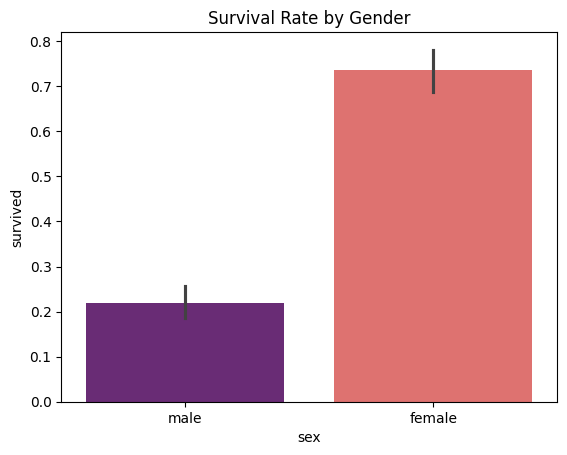

In [64]:
# Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=df, palette='magma')
plt.title("Survival Rate by Gender")
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_18640\745483912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='Blues')


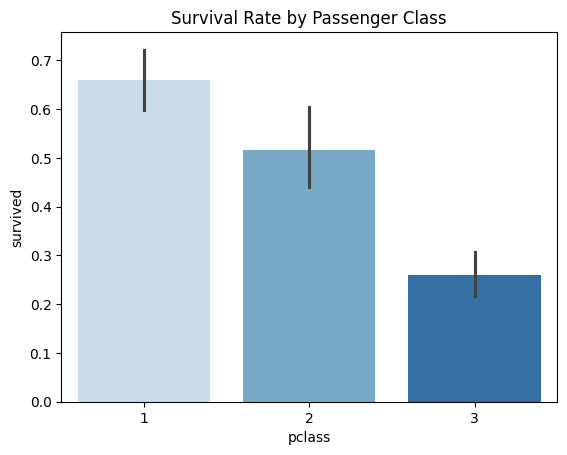

In [65]:
# Survival Rate by Passenger Class
sns.barplot(x='pclass', y='survived', data=df, palette='Blues')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Multivariate Analysis

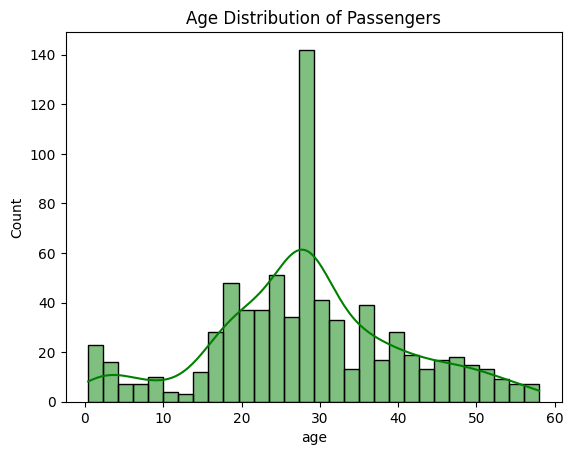

In [66]:
# Age Distribution
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.title("Age Distribution of Passengers")
plt.show()

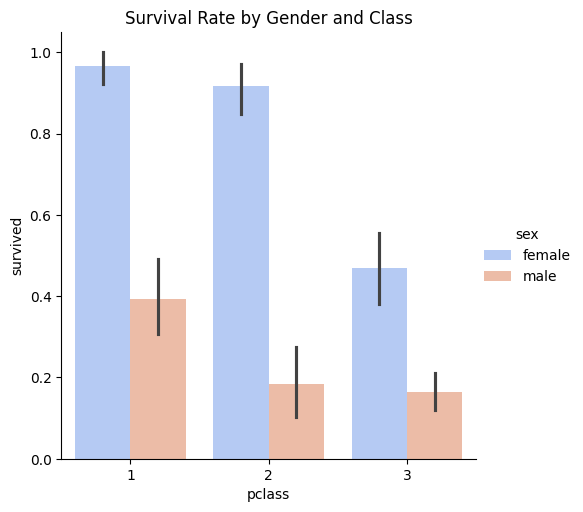

In [67]:
# Survival Rate by Gender and Class
sns.catplot(x='pclass', y='survived', hue='sex', kind='bar', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender and Class")
plt.show()

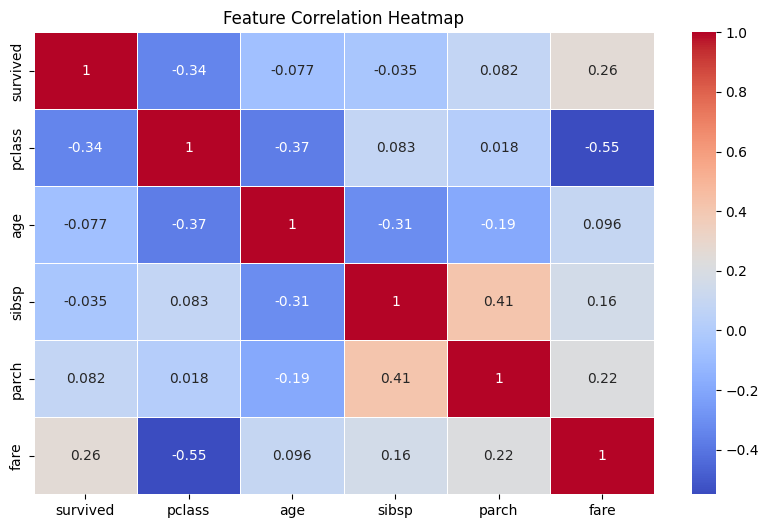

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
df = sns.load_dataset("titanic").select_dtypes(include=['number'])
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [69]:
# Create a new column 'family_size'
df['Family_size'] = df['sibsp'] + df['parch'] + 1

# Create a new column 'is_child' (1 if age < 16, else 0)
df['is_child'] = np.where(df['age'] < 16, 1, 0)

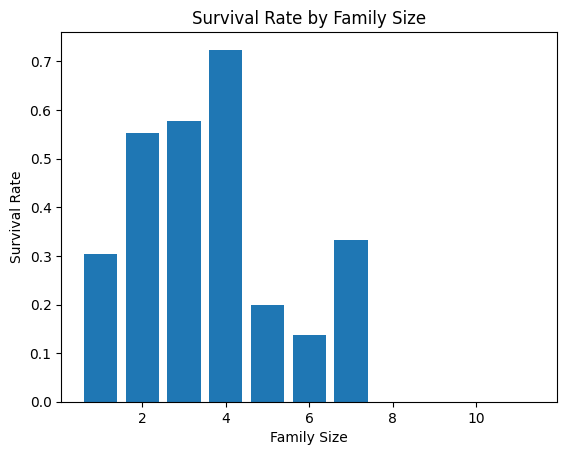

In [70]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()

# Plot using Matplotlib
plt.bar(mean_survival.index, mean_survival.values)


plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")

plt.show()